In [1]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

salary_data = pd.read_csv('salary.csv')

# Remove Nan values
salary_data.dropna(how='any',axis=0)

salary_data.shape

y = salary_data.salary

X_train, X_test, y_train, y_test = train_test_split(salary_data, y, test_size=0.2, random_state=42)
print (X_train.shape, y_train.sha pe)
print (X_test.shape, y_test.shape)

lm = smf.ols(formula='salary ~ yearsworked', data=X_train).fit() 

lm.params

(411, 11) (411,)
(103, 11) (103,)


Intercept      39853.42221
yearsworked      852.88278
dtype: float64

# Calculate the expected salary for someone with 12 years’ work experience.

In [2]:
pre_df = pd.DataFrame({'yearsworked': [12]})
lm.predict(pre_df)

0    50088.015569
dtype: float64

#### Predicted salary for 80 years work experience: 50088.01

# Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [3]:
ei = pd.DataFrame({'yearsworked': [80]})
lm.predict(ei)

0    108084.044605
dtype: float64

#### Predicted salary for 80 years work experience: 108084.04

#### It is very unlikely for someone to to have 80 years work experience.

#### The prediction amount is very low for someone with some much experience wheres someone with 12 years experince would earn about half of this prediction. The problem may be that salary is also affected by other factors within the data set

In [4]:
# create a DataFrame with the minimum and maximum values
pre_df = pd.DataFrame({'yearsworked': [salary_data.yearsworked.min(), salary_data.yearsworked.max()]})
predictions = lm.predict(pre_df)
predictions

0    39853.422210
1    74821.616187
dtype: float64

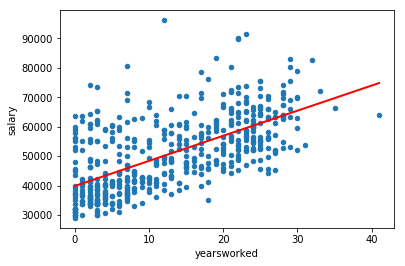

In [5]:
salary_data.plot(kind='scatter', x='yearsworked', y='salary')
plt.plot(pre_df, predictions, c='red', linewidth=2)

In [6]:

# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,38241.973844,41464.870575
yearsworked,752.014712,953.750848


# What do the 95% confidence intervals [0.025, 0.975] mean?

####  approximately 95% of the confidence intervals contain the "true" coefficient.

In [7]:
# print the p-values for the model coefficients
lm.pvalues

Intercept      4.551765e-172
yearsworked     9.006810e-48
dtype: float64

In [8]:
# print the R-squared value for the model
lm.rsquared

0.40315931469675204

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     276.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           9.01e-48
Time:                        11:26:44   Log-Likelihood:                -4359.2
No. Observations:                 411   AIC:                             8722.
Df Residuals:                     409   BIC:                             8730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.985e+04    819.750     48.617      0.000    3.82e+04    4.15e+04
yearsworked   852.8828     51.312     16.622      0.000     752.015     953.751
==============================================================================
Omnibus:                       59.000   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.150
Skew:                           1.009   Prob(JB):                     2.39e-18
Kurtosis:                       3.818   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

#### Gender
#### Education
#### exprior
#### Field